In [1]:
using OITOOLS

[ Info: Precompiling OITOOLS [3fc04337-ac9e-422b-9e4b-9feddb92e93f]


sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


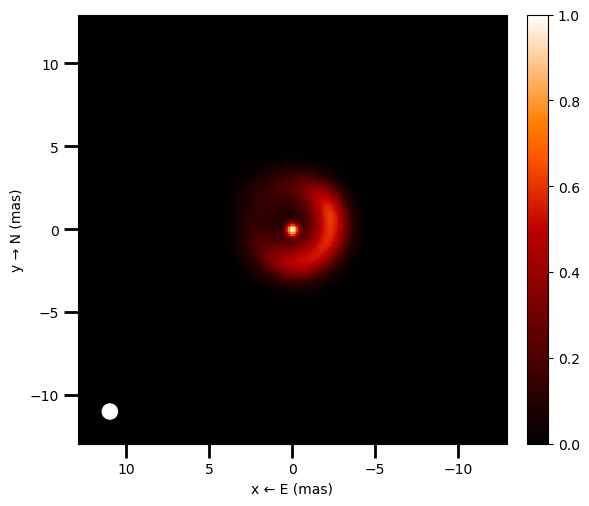

In [2]:
fitsfile = "./data/2004true.fits";
pixsize = 0.101; # in mas/pixel
x_true = readfits(fitsfile); nx = (size(x_true))[1]; x_true=vec(x_true);

# display the image
imdisp(x_true, pixscale = pixsize, tickinterval = 1.0, beamsize = 1.0, beamlocation = [0.85, 0.85], use_colorbar = true)

In [4]:
oifitsfile = "./data/2004-data1.oifits";
data = (readoifits(oifitsfile))[1,1]; # data can be split by wavelength, time, etc.

┌ Warning: OIFITSv1 detected. To be compliant with OIFITSv2 standard, OITOOLS will internally reindex stations from 1.
└ @ OITOOLS ~/SOFTWARE/OITOOLS.jl/src/readoifits.jl:540


In [5]:
data.nuv, data.nv2, data.nt3amp, data.nt3phi

(247, 195, 130, 130)

In [6]:
data.uv

2×247 Matrix{Float64}:
      -1.13996e7  -1.1696e7   …   2.1535e7    2.23659e7   2.2812e7
 -831762.0        -2.07369e6     -2.25956e7  -2.02349e7  -1.78056e7

In [7]:
data.v2

195-element Vector{Float64}:
  0.7173843383789062
  0.6997612118721008
  0.6874377131462097
  0.6793773770332336
  0.6661666035652161
  0.6605017185211182
  0.6575695872306824
  0.6490134000778198
  0.6483098864555359
  0.6418826580047607
  0.6368133425712585
  0.6322910189628601
  0.6242653131484985
  ⋮
  0.0005338648916222155
  0.0008845569682307541
  0.00013056832540314645
  0.0004299974534660578
  0.000293102755676955
  0.000656169664580375
  0.00012252644228283316
  0.0009803363354876637
  0.0003563631616998464
  0.0005742112407460809
 -6.327339360723272e-5
  0.0004951238515786827

In [8]:
data.v2_err

195-element Vector{Float64}:
 0.0024589060340076685
 0.0024117224384099245
 0.0023986389860510826
 0.0024070627987384796
 0.0023581262212246656
 0.002409725682809949
 0.002344886539503932
 0.0023144858423620462
 0.002360293408855796
 0.002351831877604127
 0.0023314813151955605
 0.0022951627615839243
 0.002311798045411706
 ⋮
 0.0003041979216504842
 0.00031144439708441496
 0.00029241933953016996
 0.0003012586385011673
 0.0002997801057063043
 0.00029902931419201195
 0.00029293709667399526
 0.0003094328276347369
 0.00029870501020923257
 0.0003005625039804727
 0.00029034417821094394
 0.00030232235440053046

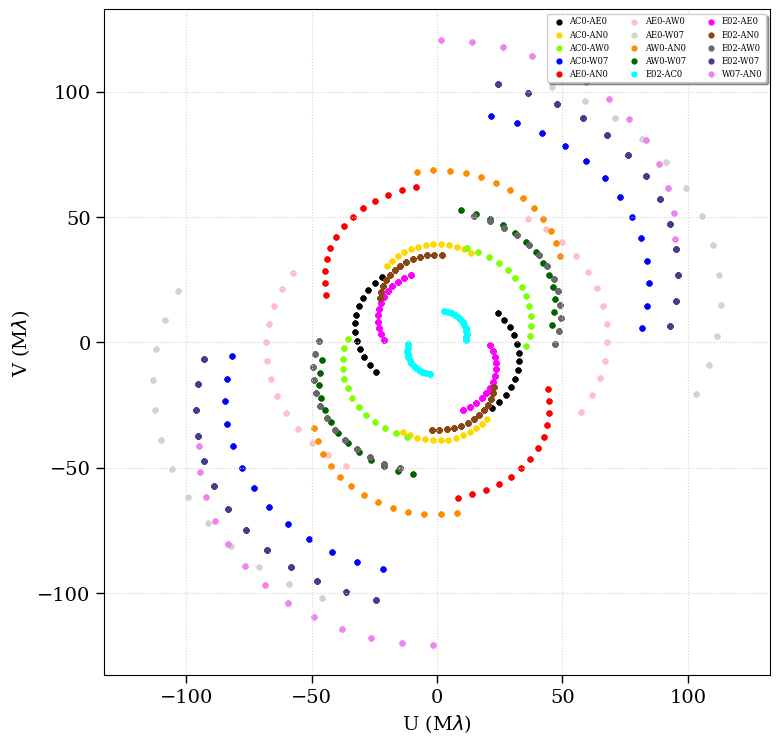

In [9]:
uvplot(data)

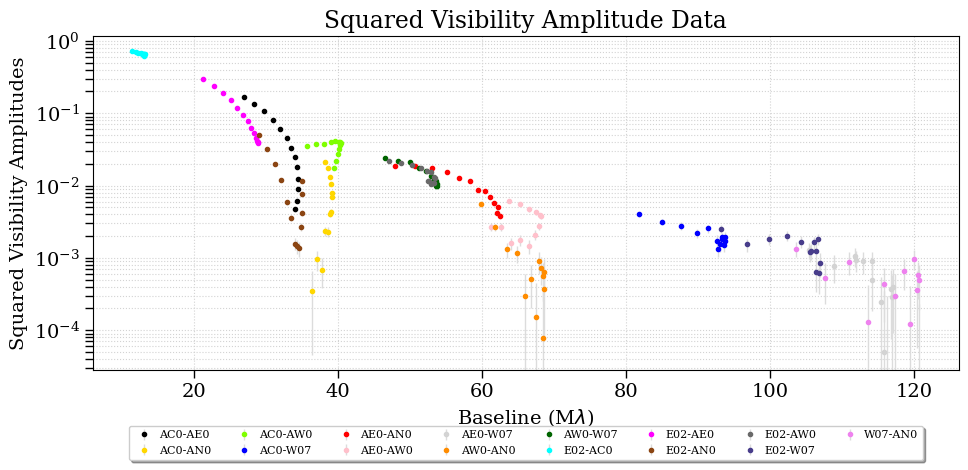

In [10]:
v2plot(data,logplot=true, legend_below=true);

In [11]:
pixsize = 0.1                               # size of a pixel in milliarcseconds
nx = 128                                    # width of image (number of pixels)
ft = setup_nfft(data, nx, pixsize);         # caches the fft needed to transform pixels to visibilities

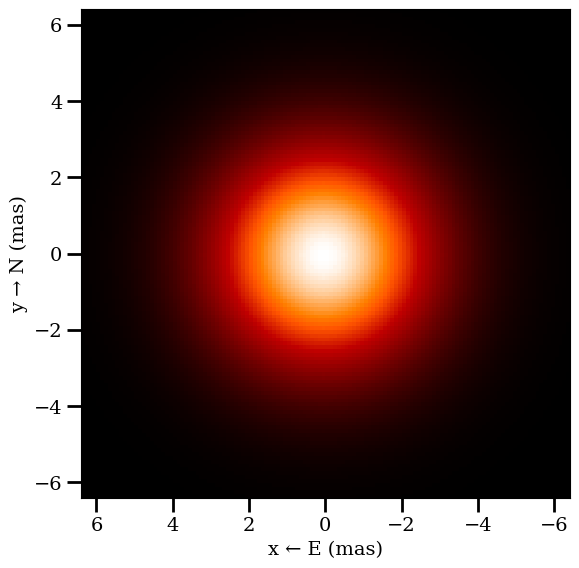

In [12]:
x_start = gaussian2d(nx,nx,nx/6);           # Starting image - one could use a Gaussian fit to the data
x_start = vec(x_start)/sum(x_start);        # Transform into 1D vector + normalize
imdisp(x_start, pixscale = pixsize);        # Display initial image

In [13]:
chi2_f(x_start, ft, data, verb=true);  # Starting chi2 - note how bad it is

V2: 1091.425313561334 T3A: 582.9810293351559 T3P: 596.9335674267621 Flux: 1.0 

In [14]:
# Let's define our regularization
# This is a vector ot vectors, with each regularizer, their weights, and their optional keywords/values
# "centering": centers the center of light of the image
# "tv": total variation, constrains the spatial gradient of the image to be sparse
# "tvsq": total square variation, , constrains the spatial gradient of the image to be smooth
# "compactness": penalizes pixels further from the center of the image
# "support": soft support constraint based on a prior image
# "l1l2": edge-preserving smoothness, parameter defines the transition between l1 and l2
# "radialvar": constrains the flux variance to remain small along azimuthal rings

regularizers = [   ["centering", 1e3], 
                   ["l1l2", 7e6, 1e-3]   
               ];

In [15]:
x = reconstruct(x_start, data, ft, regularizers = regularizers, verb = true, maxiter=100);

V2: 1091.425313561334 T3A: 582.9810293351559 T3P: 596.9335674267621 Flux: 1.0  COG:[64.01333160274137 64.01333160274137] REGC: 0.4736922577805594 ℓ1ℓ2:1.9286321669156141e-7
# ITER   EVAL   REJECTS          F(X)           ||G(X)||    STEP
#-----------------------------------------------------------------
     0      1      0    3.6669187602380686E+05  3.19E+11  0.00E+00
V2: 26518.34695498567 T3A: 2461.8024262137883 T3P: 1564.0390818464848 Flux: 53.465022159038  COG:[65.71012679886879 64.06785256442039] REGC: 1.651158275418445 ℓ1ℓ2:0.009323356213960793
V2: 26220.0384060241 T3A: 2419.688703240497 T3P: 1551.2703587610395 Flux: 26.991132192613993  COG:[65.69542900348904 64.06899838713466] REGC: 1.6148128926753254 ℓ1ℓ2:0.0033698099457982384
V2: 25595.232339446404 T3A: 2337.147528645261 T3P: 1572.8180069789016 Flux: 13.76209097645156  COG:[65.66843626481678 64.07516196544742] REGC: 1.545730660541478 ℓ1ℓ2:0.0011136089379390481
V2: 24209.976764614894 T3A: 2176.9076421410737 T3P: 1617.6807147568

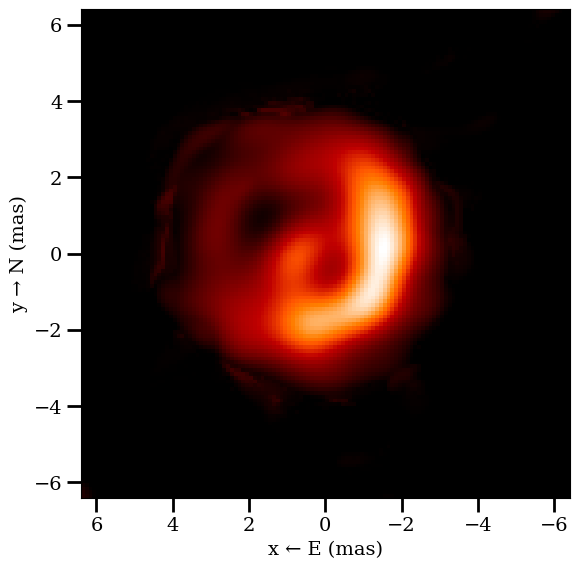

In [16]:
imdisp(x,pixscale=pixsize); 

In [19]:
# Chi2 at solution
chi2 = chi2_f(x, ft, data, verb=true);

V2: 0.9268971103004064 T3A: 0.7082594090596314 T3P: 0.479692905455698 Flux: 0.9853161041477199 

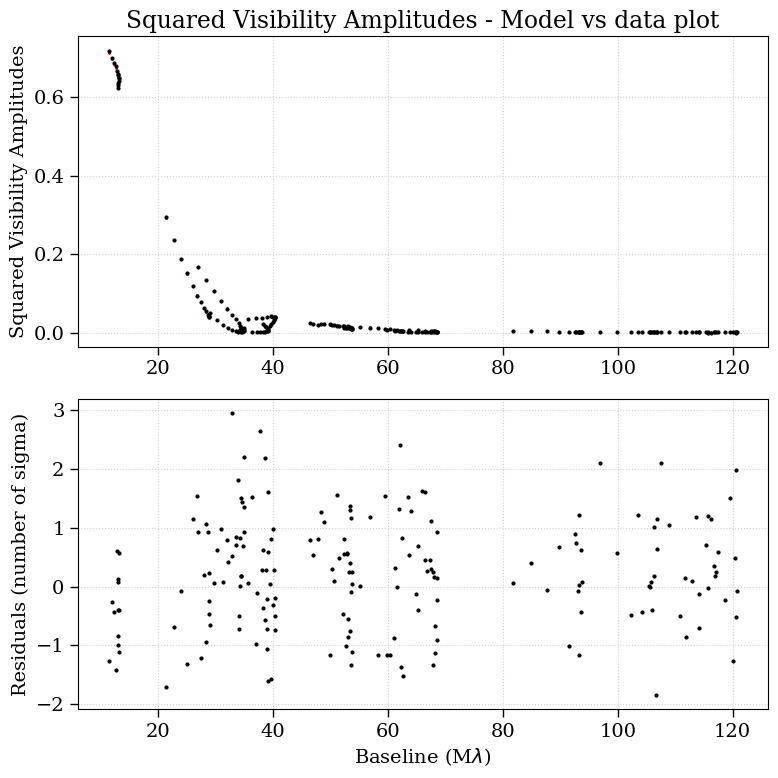

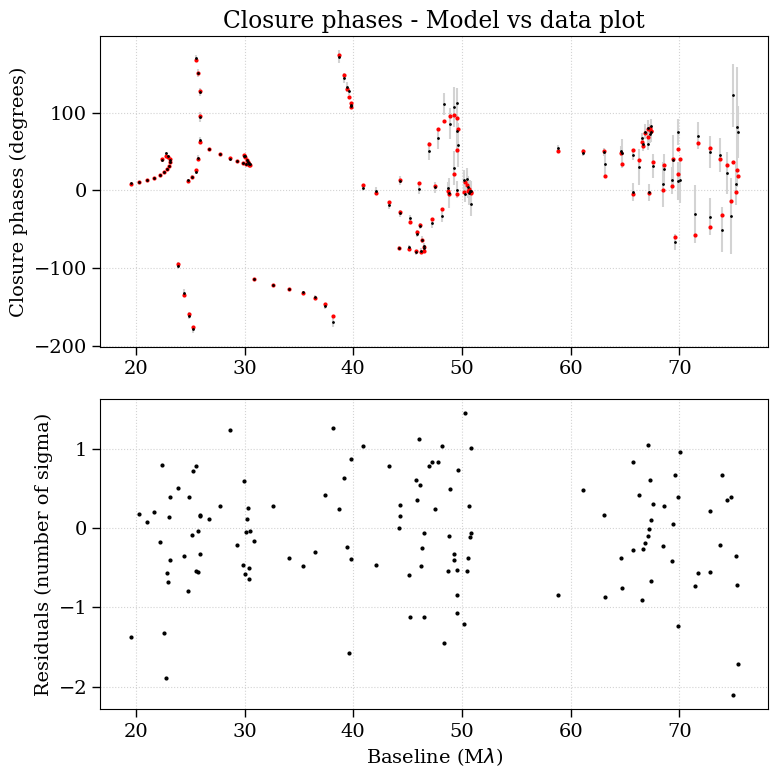

In [20]:
v2_model, t3amp_model, t3phi_model = image_to_obs(x, ft, data)
plot_v2_vs_data(data, v2_model);
plot_t3phi_vs_data(data, t3phi_model);

In [84]:
#
# PRACTICE EXAMPLE 1: Reconstructing a simple binary
#

oifitsfile = "./data/betlyr6t.oifits" # or oifitsfile = "./data/iota_peg_6t.oifits"
data = vec(readoifits(oifitsfile)); 

# NOW DO IT!



┌ Warning: OIFITSv1 detected. To be compliant with OIFITSv2 standard, OITOOLS will internally reindex stations from 1.
└ @ OITOOLS ~/SOFTWARE/OITOOLS.jl/src/readoifits.jl:540


In [85]:
#
# PRACTICE EXAMPLE 2: Reconstructing a spotted disk
#

oifitsfile = "/dbstorage/workshop_data/MIRC_lamAnd_Martinez_2021/2011Sep10_01_MIRC_lamAnd_Martinez.oifits"
data = vec(readoifits(oifitsfile)); 

# Now do it!



In [24]:
#
# A tough example: YSO disk
#

oifitsfile = "./data/MWC480.oifits"
data = vec(readoifits(oifitsfile, filter_bad_data = true, polychromatic = true)); 
# vec is to get rid of degenerate (temporal) dimension

In [25]:
length(data)

8

In [26]:
[data[i].nv2 for i=1:length(data)]

8-element Vector{Int64}:
 157
 157
 156
 155
 157
 155
 155
 141

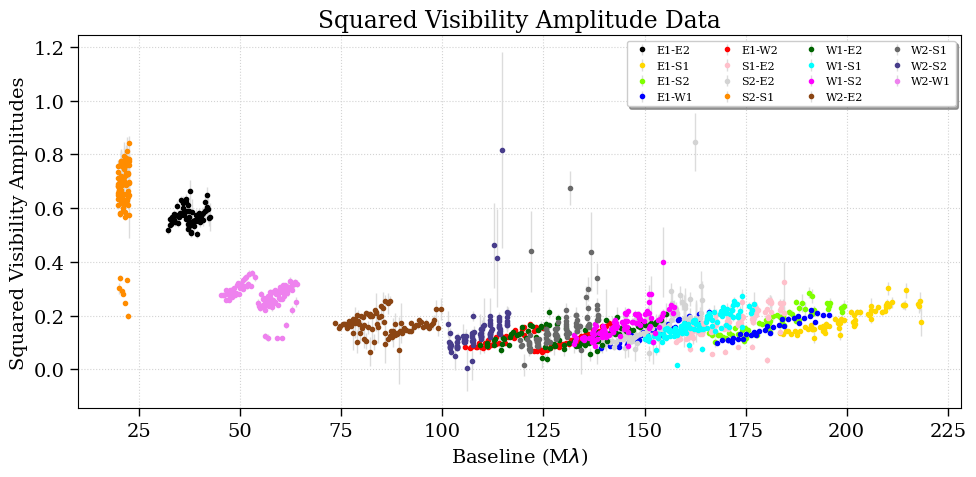

In [27]:
v2plot(data)

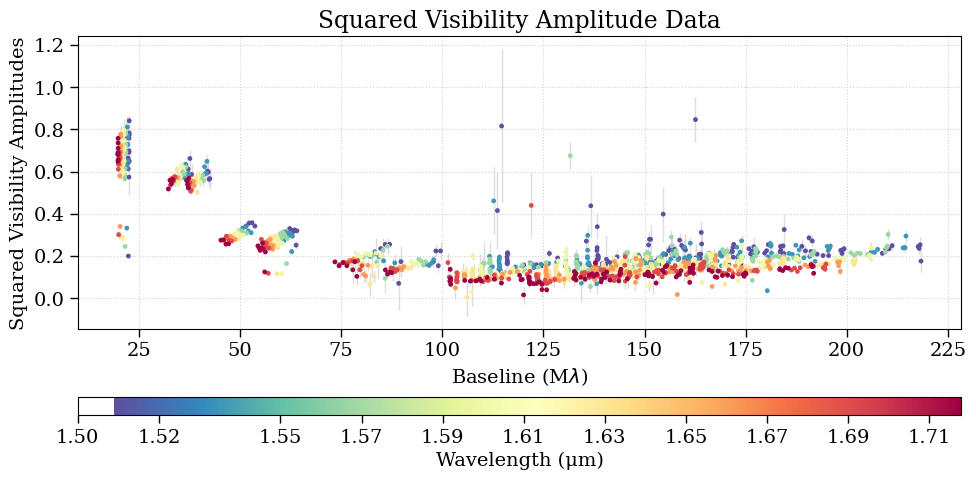

In [30]:
v2plot(data,color="wav")

In [83]:
nx = 64 #number of pixels (side)
pixsize = 0.1 # mas/pixel

fftplan = setup_nfft_polychromatic(data, nx, pixsize);
nwav = length(fftplan)

# Setup regularization
regularizers = [   [ ["centering", 1e4], ["tv", 50] ]]  # Frame 1 is centered
for i=1:nwav-1
    push!(regularizers,[["centering", 1e4], ["tv",50]]) # Total variation for all
end
push!(regularizers,[ ["transspectral_tvsq", 1e5] ] ); #transspectral regularization ties the frames together

pointsource = zeros(nx,nx); 
pointsource[div(nx,2)+1, div(nx,2)+1] = 1.0;
x_start = repeat(pointsource, 1, 1, nwav);
x_start = vec(x_start);

In [81]:
x = reconstruct_polychromatic(x_start, data, fftplan, regularizers = regularizers, maxiter = 500, verb=false);
# Convergence will be slow

Indpt images -- Crit: 2.9017321680314343e7 Crit/dof: 6819.582063528635 
Trans-spectral squared TV: 0.0
Post trans -- Crit: 2.9017321680314343e7 Crit/dof: 6819.582063528635 
# ITER   EVAL   REJECTS          F(X)           ||G(X)||    STEP
#-----------------------------------------------------------------
     0      1      0    2.9017321680314343E+07  4.09E+09  0.00E+00
Indpt images -- Crit: 1.2081610672181814e6 Crit/dof: 283.93914623224003 
Trans-spectral squared TV: 192739.91987664712
Post trans -- Crit: 1.4009009870948286e6 Crit/dof: 329.23642469913716 
     1      2      0    1.4009009870948286E+06  1.59E+07  2.45E-10
Indpt images -- Crit: 1.15585467148591e6 Crit/dof: 271.64622126578377 
Trans-spectral squared TV: 192426.65950270573
Post trans -- Crit: 1.3482813309886158e6 Crit/dof: 316.86987802317645 
     2      3      0    1.3482813309886158E+06  1.18E+07  1.00E+00
Indpt images -- Crit: 1.0787145251924677e6 Crit/dof: 253.51692718976915 
Trans-spectral squared TV: 191548.842041944

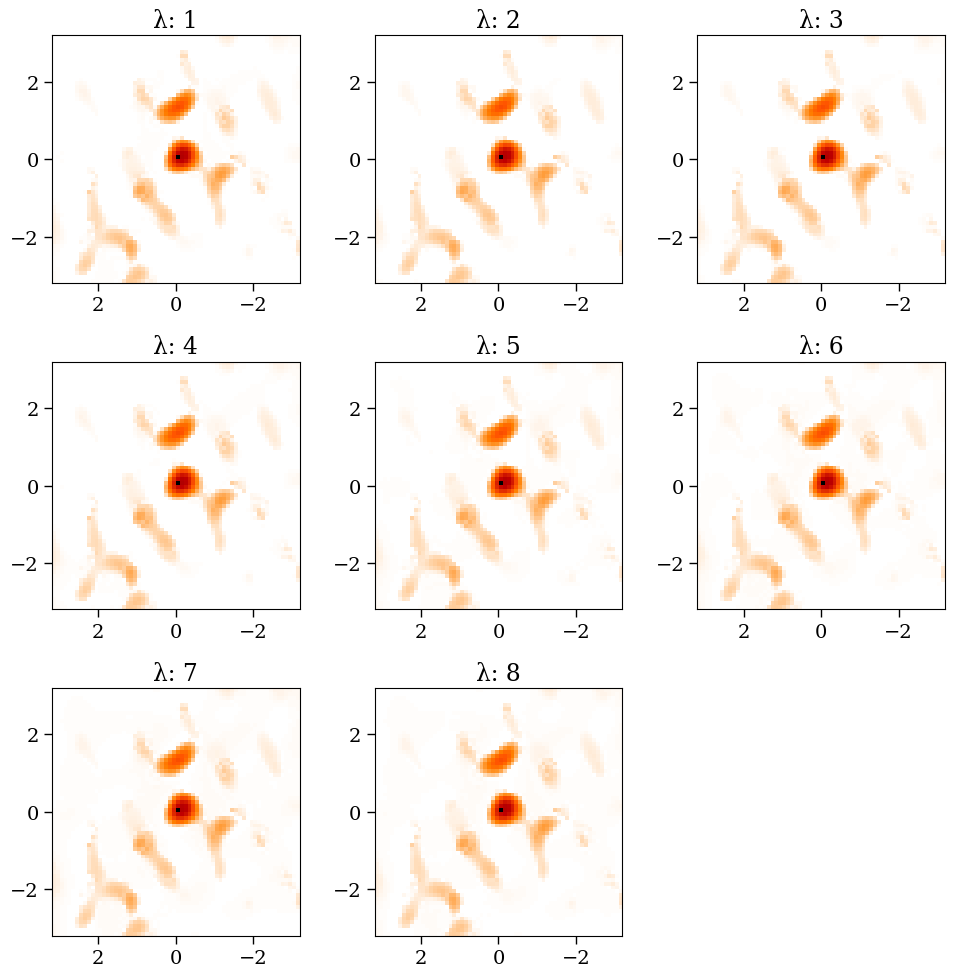

In [82]:
imdisp_polychromatic(reshape(x,nx*nx,nwav).^.7, pixscale=pixsize, colormap = "gist_heat_r")